In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

## Código com pandas

In [2]:
# Criando DataFrames das tabelas

clientes = pd.DataFrame({
    "CD_CLIENTE": [1, 2, 3, 4, 5],
    "NM_CLIENTE": ["João", "Maria", "José", "Adilson", "Cleber"]
})

transacoes = pd.DataFrame({
    "CD_CLIENTE": [1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 3, 3, 3, 4],
    "DT_TRANSACAO": pd.to_datetime(["2021-08-28", "2021-09-09", "2021-09-17", "2021-11-15", "2021-12-24",
                                      "2021-10-28", "2021-11-07", "2021-12-05", "2021-12-14", "2021-12-21",
                                      "2021-10-05", "2021-11-05", "2021-12-05", "2021-10-09"]),
    "CD_TRANSACAO": ["000", "110", "220", "110", "220", "110", "110", "220", "220", "220", "110", "110", "110", "000"],
    "VR_TRANSACAO": [20.00, 78.90, -58.00, 178.90, -110.37, 220.00, 380.00, -398.86, -33.90, -16.90, 720.90, 720.90, 720.90, 50.00]
})

In [3]:
clientes

,CD_CLIENTE,NM_CLIENTE
0,1,João
1,2,Maria
2,3,José
3,4,Adilson
4,5,Cleber


In [4]:
# Convertendo valores de saída para negativo
transacoes.loc[transacoes['CD_TRANSACAO'].isin(["220"]), 'VR_TRANSACAO'] *= -1

In [5]:
transacoes

,CD_CLIENTE,DT_TRANSACAO,CD_TRANSACAO,VR_TRANSACAO
0,1,2021-08-28,000,20.00
1,1,2021-09-09,110,78.90
2,1,2021-09-17,220,58.00
3,1,2021-11-15,110,178.90
4,1,2021-12-24,220,110.37
5,5,2021-10-28,110,220.00
6,5,2021-11-07,110,380.00
7,5,2021-12-05,220,398.86
8,5,2021-12-14,220,33.90
9,5,2021-12-21,220,16.90


### 1. Qual cliente teve o maior saldo médio no mês 11?

In [6]:
mensal = transacoes[transacoes['DT_TRANSACAO'].dt.month == 11]
saldo_medio = mensal.groupby('CD_CLIENTE')['VR_TRANSACAO'].mean().idxmax()
maior_saldo_medio = clientes.loc[clientes['CD_CLIENTE'] == saldo_medio, 'NM_CLIENTE'].values[0]
print("Cliente com maior saldo médio no mês 11:", maior_saldo_medio)

Cliente com maior saldo médio no mês 11: José


### 2. Qual é o saldo de cada cliente?

In [7]:
saldo_por_cliente = transacoes.groupby("CD_CLIENTE")["VR_TRANSACAO"].sum()
print("Saldo por cliente:\n", saldo_por_cliente)

Saldo por cliente:
 CD_CLIENTE
1     446.17
3    2162.70
4      50.00
5    1049.66
Name: VR_TRANSACAO, dtype: float64


### 3. Qual é o saldo médio de clientes que receberam CashBack?

In [8]:
clientes_cashback = transacoes[transacoes['CD_TRANSACAO'] == "000"]["CD_CLIENTE"].unique()
saldo_cashback = saldo_por_cliente.loc[clientes_cashback].mean()
print("Saldo médio de clientes que receberam CashBack:", saldo_cashback)

Saldo médio de clientes que receberam CashBack: 248.085


### 4. Qual o ticket médio das quatro últimas movimentações dos usuários?

In [9]:
ticket_medio = transacoes.groupby("CD_CLIENTE").apply(lambda x: x.nlargest(4, "DT_TRANSACAO")["VR_TRANSACAO"].mean())
print("Ticket médio das quatro últimas movimentações:\n", ticket_medio)

Ticket médio das quatro últimas movimentações:
 CD_CLIENTE
1    106.5425
3    720.9000
4     50.0000
5    207.4150
dtype: float64


### 5. Qual é a proporção entre Cash In/Out mensal?

In [10]:
transacoes["AnoMes"] = transacoes["DT_TRANSACAO"].dt.to_period("M")
proporcao = transacoes.pivot_table(index="AnoMes", columns="CD_TRANSACAO", values="VR_TRANSACAO", aggfunc="sum", fill_value=0)
proporcao["Proporcao_CashIn_Out"] = proporcao["110"] / abs(proporcao["220"])
print("Proporção entre Cash In/Out mensal:\n", proporcao[["Proporcao_CashIn_Out"]])

Proporção entre Cash In/Out mensal:
 CD_TRANSACAO  Proporcao_CashIn_Out
AnoMes                            
2021-08                        NaN
2021-09                   1.360345
2021-10                        inf
2021-11                        inf
2021-12                   1.287252


### 6. Qual a última transação de cada tipo para cada usuário?

In [11]:
ultima_transacao_tipo = transacoes.sort_values("DT_TRANSACAO").groupby(["CD_CLIENTE", "CD_TRANSACAO"]).last()
print("Última transação de cada tipo por usuário:\n", ultima_transacao_tipo)

Última transação de cada tipo por usuário:
                         DT_TRANSACAO  VR_TRANSACAO   AnoMes
CD_CLIENTE CD_TRANSACAO                                    
1          000            2021-08-28         20.00  2021-08
           110            2021-11-15        178.90  2021-11
           220            2021-12-24        110.37  2021-12
3          110            2021-12-05        720.90  2021-12
4          000            2021-10-09         50.00  2021-10
5          110            2021-11-07        380.00  2021-11
           220            2021-12-21         16.90  2021-12


### 7. Qual a última transação de cada tipo para cada usuário por mês?

In [12]:
ultima_transacao_mes = transacoes.sort_values("DT_TRANSACAO").groupby(["CD_CLIENTE", "CD_TRANSACAO", "AnoMes"]).last()
print("Última transação de cada tipo por usuário por mês:\n", ultima_transacao_mes)

Última transação de cada tipo por usuário por mês:
                                 DT_TRANSACAO  VR_TRANSACAO
CD_CLIENTE CD_TRANSACAO AnoMes                            
1          000          2021-08   2021-08-28         20.00
           110          2021-09   2021-09-09         78.90
                        2021-11   2021-11-15        178.90
           220          2021-09   2021-09-17         58.00
                        2021-12   2021-12-24        110.37
3          110          2021-10   2021-10-05        720.90
                        2021-11   2021-11-05        720.90
                        2021-12   2021-12-05        720.90
4          000          2021-10   2021-10-09         50.00
5          110          2021-10   2021-10-28        220.00
                        2021-11   2021-11-07        380.00
           220          2021-12   2021-12-21         16.90


### 8. Qual a quantidade de usuários que movimentaram a conta?

In [13]:
usuarios_ativos = transacoes["CD_CLIENTE"].nunique()
print("Quantidade de usuários que movimentaram a conta:", usuarios_ativos)

Quantidade de usuários que movimentaram a conta: 4


### 9. Qual o balanço do final de 2021?

In [14]:
balanco_final_2021 = transacoes[transacoes['DT_TRANSACAO'].dt.month == 12].groupby('CD_CLIENTE')['VR_TRANSACAO'].sum()
print("Balanço final de 2021:\n", balanco_final_2021)

Balanço final de 2021:
 CD_CLIENTE
1    110.37
3    720.90
5    449.66
Name: VR_TRANSACAO, dtype: float64


### 10. Quantos usuários que receberam CashBack continuaram interagindo com este banco?

In [15]:
clientes_cashback = set(transacoes[transacoes['CD_TRANSACAO'] == "000"]["CD_CLIENTE"])
clientes_ativos = set(transacoes["CD_CLIENTE"])
clientes_continuaram = len(clientes_cashback.intersection(clientes_ativos))
print("Usuários que receberam CashBack e continuaram interagindo:", clientes_continuaram)

Usuários que receberam CashBack e continuaram interagindo: 2


### 11. Qual a primeira e a última movimentação dos usuários com saldo maior que R$100?

In [16]:
usarios_saldo_maior_100 = saldo_por_cliente[saldo_por_cliente > 100].index
movimentacoes = transacoes[transacoes['CD_CLIENTE'].isin(usarios_saldo_maior_100)]
primeira_ultima = movimentacoes.groupby('CD_CLIENTE').agg({'DT_TRANSACAO': ['min', 'max']})
print("Primeira e última movimentação dos usuários com saldo maior que R$100:\n", primeira_ultima)

Primeira e última movimentação dos usuários com saldo maior que R$100:
            DT_TRANSACAO           
                    min        max
CD_CLIENTE                        
1            2021-08-28 2021-12-24
3            2021-10-05 2021-12-05
5            2021-10-28 2021-12-21


### 12. Qual o balanço das últimas quatro movimentações de cada usuário?

In [17]:
balanco_ultimas4 = transacoes.groupby("CD_CLIENTE").apply(lambda x: x.nlargest(4, "DT_TRANSACAO")["VR_TRANSACAO"].sum())
print("Balanço das últimas quatro movimentações:\n", balanco_ultimas4)

Balanço das últimas quatro movimentações:
 CD_CLIENTE
1     426.17
3    2162.70
4      50.00
5     829.66
dtype: float64


### 13. Qual o ticket médio das últimas quatro movimentações de cada usuário?

In [18]:
ticket_medio_ultimas4 = transacoes.groupby("CD_CLIENTE").apply(lambda x: x.nlargest(4, "DT_TRANSACAO")["VR_TRANSACAO"].mean())
print("Ticket médio das últimas quatro movimentações:\n", ticket_medio_ultimas4)

Ticket médio das últimas quatro movimentações:
 CD_CLIENTE
1    106.5425
3    720.9000
4     50.0000
5    207.4150
dtype: float64


## Graphs

In [19]:
# Convertendo datas para datetime
transacoes['DT_TRANSACAO'] = pd.to_datetime(transacoes['DT_TRANSACAO'])

# Filtrando transações de novembro
novembro = transacoes[(transacoes['DT_TRANSACAO'].dt.month == 11) & (transacoes['DT_TRANSACAO'].dt.year == 2021)]

# Calculando saldo médio por cliente
novembro['SALDO'] = novembro.groupby('CD_CLIENTE')['VR_TRANSACAO'].transform('sum')
saldo_medio = novembro.groupby('CD_CLIENTE')['SALDO'].mean().reset_index()

# Encontrar o cliente com o maior saldo médio
cliente_maior_saldo = saldo_medio.loc[saldo_medio['SALDO'].idxmax()]

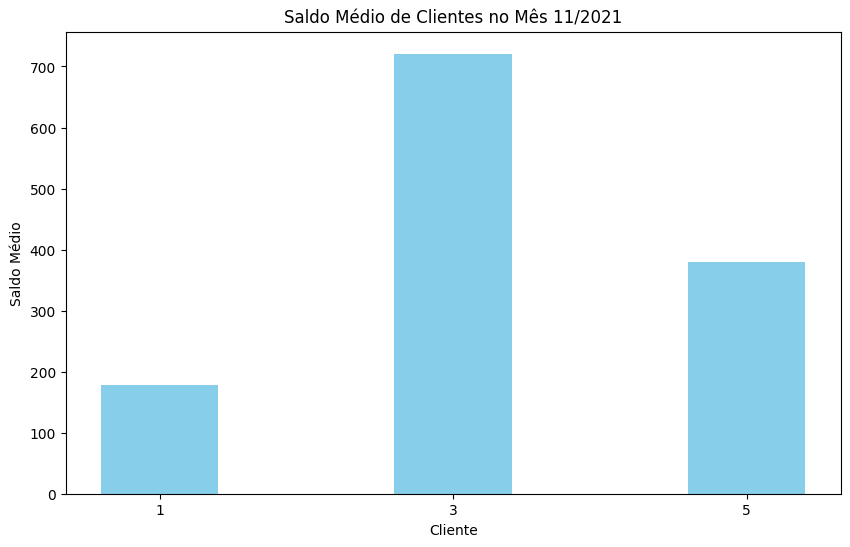

In [20]:
plt.figure(figsize=(10, 6))
plt.bar(saldo_medio['CD_CLIENTE'], saldo_medio['SALDO'], color='skyblue')
plt.xlabel('Cliente')
plt.ylabel('Saldo Médio')
plt.title('Saldo Médio de Clientes no Mês 11/2021')
plt.xticks(saldo_medio['CD_CLIENTE'])
plt.show()

In [21]:
# Calculando o saldo total por cliente
saldo_cliente = transacoes.groupby('CD_CLIENTE')['VR_TRANSACAO'].sum().reset_index()

# Merge com a tabela de clientes para mostrar o nome
saldo_cliente = saldo_cliente.merge(clientes, on='CD_CLIENTE')

### Gráfico de barras do saldo de cada cliente

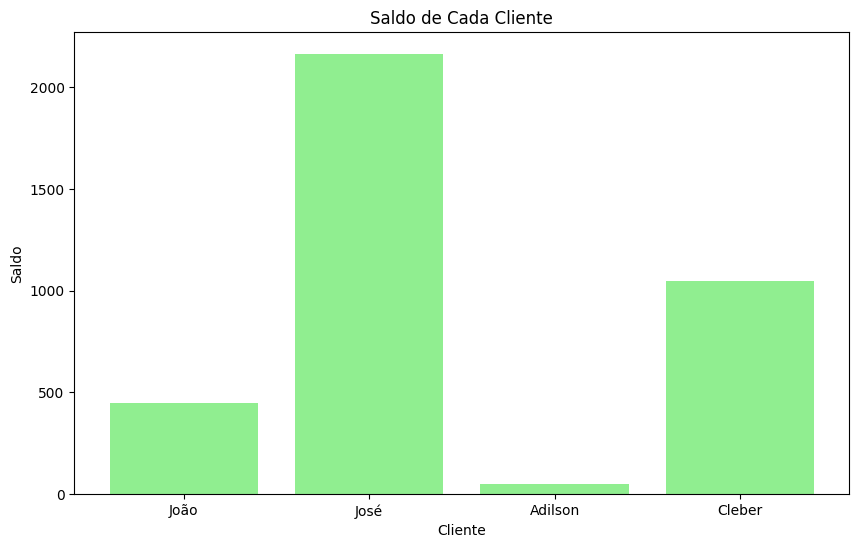

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(saldo_cliente['NM_CLIENTE'], saldo_cliente['VR_TRANSACAO'], color='lightgreen')
plt.xlabel('Cliente')
plt.ylabel('Saldo')
plt.title('Saldo de Cada Cliente')
plt.show()

In [23]:
# Ordenando as transações por cliente e data
transacoes = transacoes.sort_values(by=['CD_CLIENTE', 'DT_TRANSACAO'], ascending=[True, False])

# Pegando as últimas 4 transações
ultimas_4 = transacoes.groupby('CD_CLIENTE').head(4)

### Gráfico de barras do ticket médio

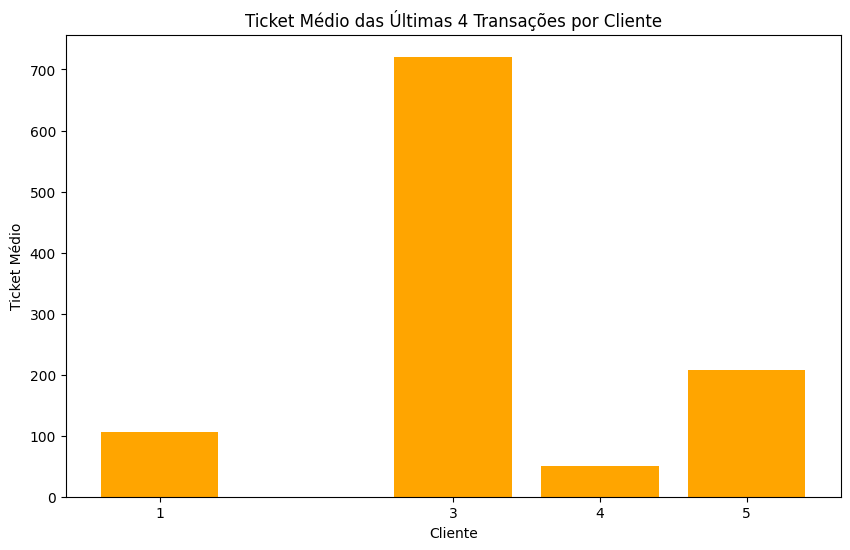

In [24]:
ticket_medio = ultimas_4.groupby('CD_CLIENTE')['VR_TRANSACAO'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(ticket_medio['CD_CLIENTE'], ticket_medio['VR_TRANSACAO'], color='orange')
plt.xlabel('Cliente')
plt.ylabel('Ticket Médio')
plt.title('Ticket Médio das Últimas 4 Transações por Cliente')
plt.xticks(ticket_medio['CD_CLIENTE'])
plt.show()